In [1]:
# loading libraries

# general libraries
import pandas as pd
import numpy as np

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# stats libraries
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, f1_score, precision_score, recall_score

In [2]:
# loading the datatset containing application record

df_application_record = pd.read_csv('application_record.csv')

# previewing the dataset

df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
# checking shape of the dataset (application_record)

print('The number of rows in Application Record dataset is', df_application_record.shape[0] , '\n')

print('The number of columns in Application Record dataset is', df_application_record.shape[1])

The number of rows in Application Record dataset is 438557 

The number of columns in Application Record dataset is 18


In [4]:
df_application_record.dtypes # checking datatypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [5]:
# loading the datatset containing credit record

df_credit_record = pd.read_csv('credit_record.csv')

# previewing the dataset

df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# checking shape of the dataset (credit_record)

print('The number of rows in Credit Record dataset is', df_credit_record.shape[0] , '\n')

print('The number of columns in Credit Record dataset is', df_credit_record.shape[1])

The number of rows in Credit Record dataset is 1048575 

The number of columns in Credit Record dataset is 3


In [7]:
# checking data types

df_credit_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [8]:
# Merging the two datasets on ID basis

df = pd.merge(df_application_record, df_credit_record, on='ID' , how='inner')

In [9]:
# previewing the dataset

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [10]:
# checking the shape of the new dataframe

print(f'The number of rows in merged dataset (df) = {df.shape[0]} \n The number of columns in merged dataset (df) is = {df.shape[1]}' )

The number of rows in merged dataset (df) = 777715 
 The number of columns in merged dataset (df) is = 20


In [11]:
# checking for null values

df.isna().sum() 

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

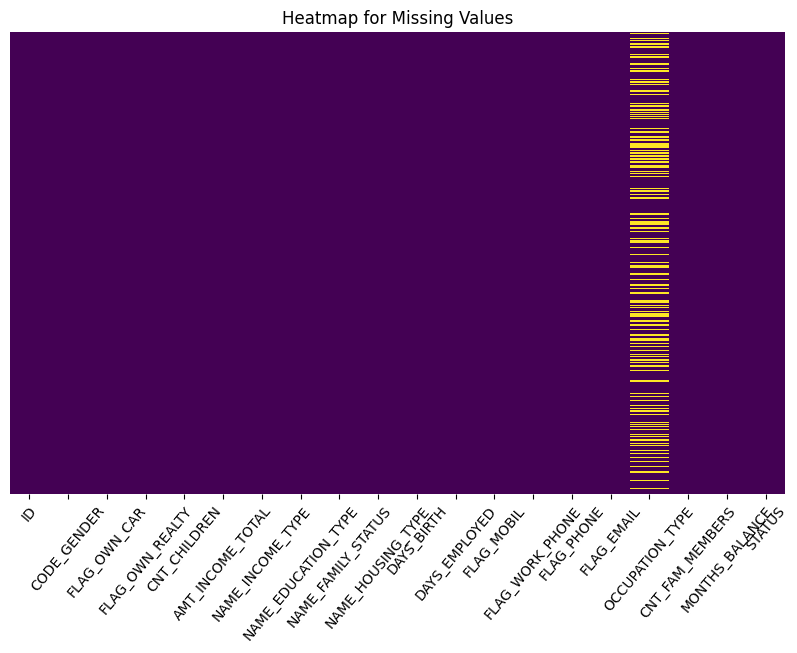

In [12]:
# plotting the heatmap to check for null values

# definig the figure size
plt.figure(figsize=(10, 6))

# plotting the heatmap of missing values
sns.heatmap(df.isna(), cbar=False , yticklabels=False, cmap='viridis')

# defining the title
plt.title('Heatmap for Missing Values')
plt.xticks(rotation=50)
plt.show()

In [13]:
# check for the percentage of missing values in `OCCUPATION_TYPE` column

df['OCCUPATION_TYPE'].isna().sum() / df.shape[0] * 100

30.86580559716606

In [14]:
df.drop('OCCUPATION_TYPE', axis=1, inplace=True) # dropping the column `OCCUPATION_TYPE`

In [15]:
# confirming the outcome 

df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [16]:
# check for the count of unique values in each column

df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

In [17]:
# checking for duplicates

df.duplicated().sum()

0

In [18]:
df[df['ID'].duplicated()].head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-9,C
10,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-10,C


In [19]:
df[df['ID'].duplicated()].tail(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777694,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-3,0
777695,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-4,0
777696,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-5,0
777697,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-6,0
777698,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-7,0
777699,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-8,0
777700,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-9,0
777702,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-1,0
777703,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-2,0
777704,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-3,0


In [20]:
# renaming columns in a meaning full way

df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'

} , inplace=True)

In [21]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status'],
      dtype='object')

In [22]:
# checking for columns with object dtype

df.select_dtypes(include='object').columns

Index(['gender', 'own_car', 'own_property', 'income_type', 'education',
       'family_status', 'housing_type', 'status'],
      dtype='object')

In [23]:
# checking for unique values in some columns

col = ['gender', 'own_car', 'own_property']

for i in col:
    print(f'{df[i].value_counts()}')

F    518851
M    258864
Name: gender, dtype: int64
N    473355
Y    304360
Name: own_car, dtype: int64
Y    512948
N    264767
Name: own_property, dtype: int64


In [24]:
# maping the values in some columns


# mapping unique enteries of gender
df['gender'] = df['gender'].map({'F':'female', 'M': 'male'})

# mapping unique enteries of own_car
df['own_car'] = df['own_car'].map({'N': 'no', 'Y': 'yes'})

# mapping unique enteries of own_property
df['own_property'] = df['own_property'].map({'N': 'no', 'Y': 'yes'})

In [25]:
# check for unique values in status column

df['status'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: status, dtype: int64

In [26]:
# maping the values in status column and storing result in new column

df['loan_status'] = df['status'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})

In [27]:
# confirming the outcome

df.columns.values

array(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone',
       'phone', 'email', 'family_members', 'months_balance', 'status',
       'loan_status'], dtype=object)

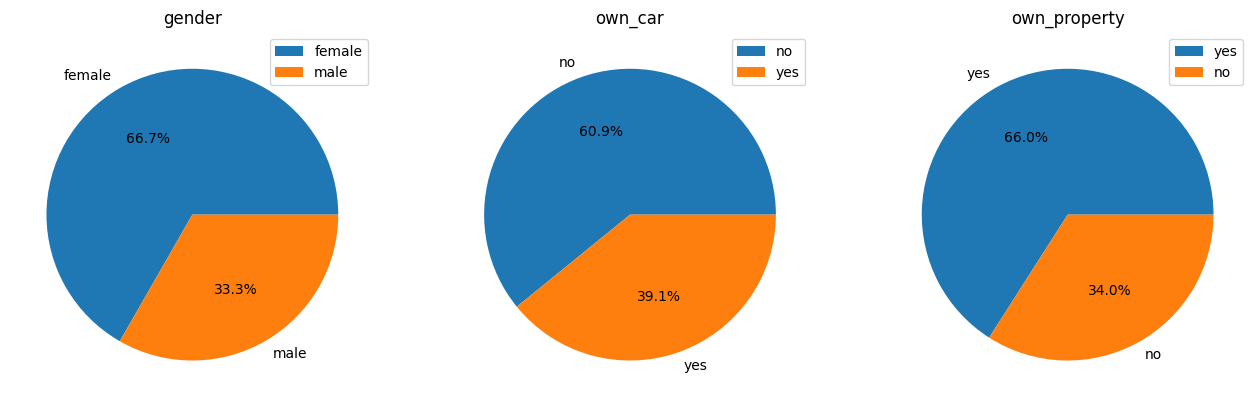

In [28]:
#Checking for distribution of [gender , own_car,  own_property , income_type]
# Define the list of column names
columns = ['gender', 'own_car', 'own_property']

# Create subplots for each column
plt.figure(figsize=(16 , 9))  # Adjust the figure size as needed

for i in range(len(columns)):
    plt.subplot(1, 3, i+1)
    plt.title(columns[i])  # Use the column name as the title
    
    # Plot pie chart
    counts = df[columns[i]].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%'  )
    
    # Add legend with unique values
    plt.legend(counts.index)
plt.show()

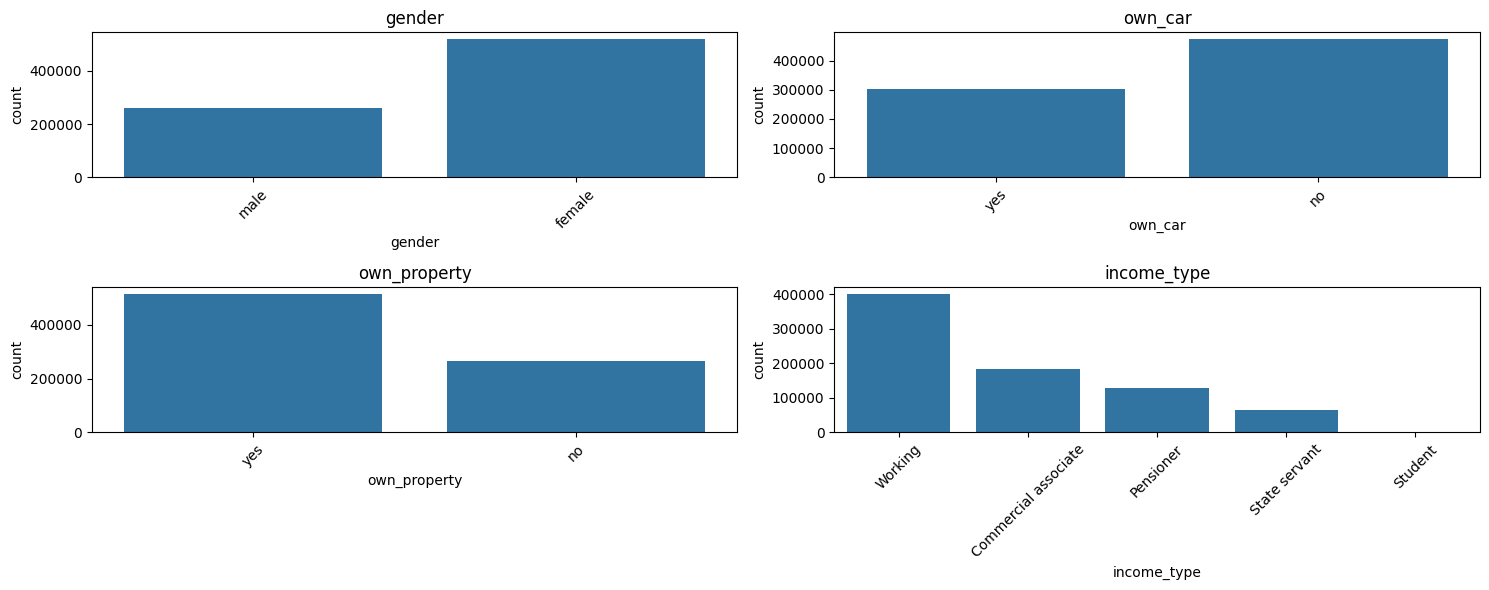

In [29]:
# creating list of specific columns
col = ['gender', 'own_car', 'own_property', 'income_type',]

# defining the figure size
plt.figure(figsize=(15, 6))

# plotting the countplot using for loop
for i in range(len(col)):
    # defining the subplot
    plt.subplot(2, 2, i+1)
    # adding title
    plt.title(col[i])
    # plotting the countplot
    sns.countplot(data=df, x=df[col[i]])
    # rotating the x-axis labels
    plt.xticks(rotation=45)
# layout adjustment
plt.tight_layout()
plt.show()

In [30]:
# checking the count of loan status

df['loan_status'].value_counts()

good                 329536
first_month_due      290654
no_loan              145950
2nd_month_due          8747
bad_debt               1527
3rd_month_overdue       801
4th_month_overdue       286
5th_month_overdue       214
Name: loan_status, dtype: int64

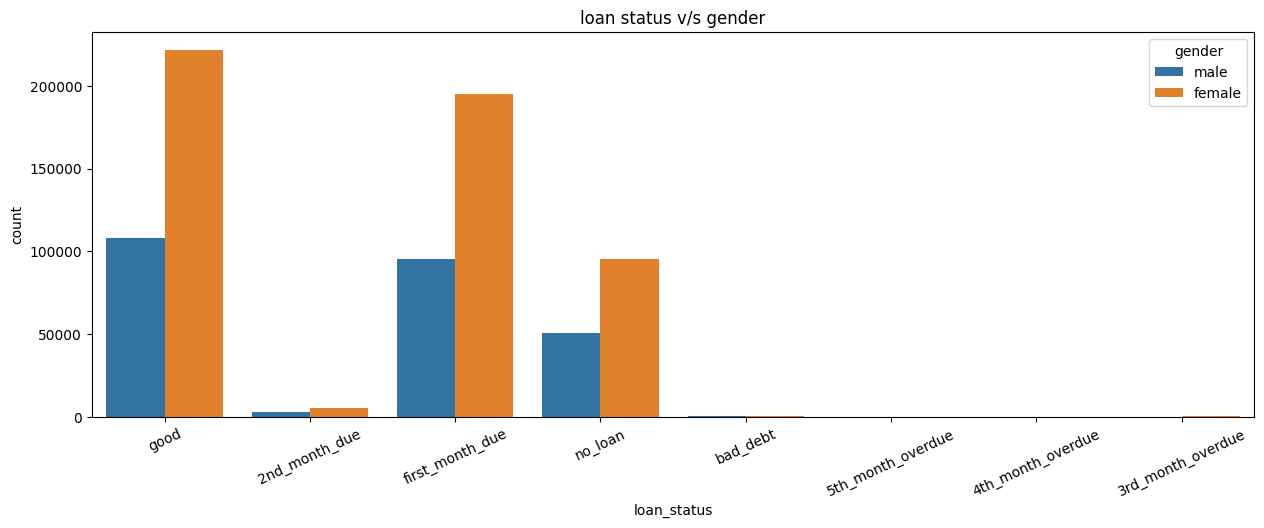

In [31]:
# checking the relationship between loan status and gender

# defining the figure size
plt.figure(figsize=(15, 5))

# plotting the countplot
sns.countplot(data=df, x=df['loan_status'], hue=df['gender'])

# defining the tilte
plt.title('loan status v/s gender')
# rotating the x-axis labels
plt.xticks(rotation=25)
plt.show()

In [32]:
# value count of loan status v/s gender
filtered_loan = df.groupby('loan_status')['gender'].value_counts()

# filtering the values less than 10000
filtered_loan[filtered_loan<10000].unstack()

gender,female,male
loan_status,,
2nd_month_due,5530,3217
3rd_month_overdue,510,291
4th_month_overdue,178,108
5th_month_overdue,128,86
bad_debt,809,718


<Figure size 1500x900 with 0 Axes>

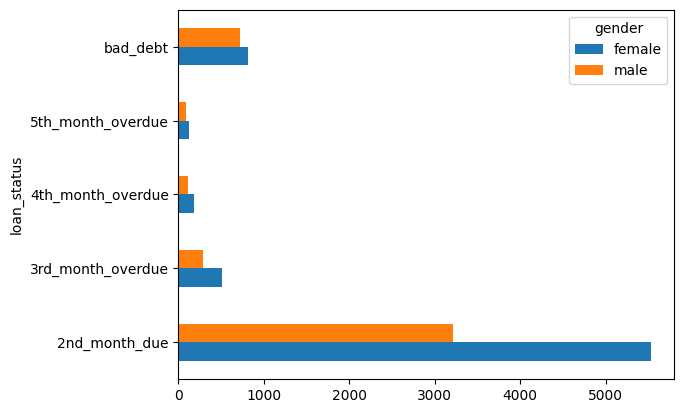

In [33]:
# value count of loan status v/s gender
filtered_loan = df.groupby('loan_status')['gender'].value_counts()

# filtering the values less than 10000

plt.figure(figsize=(15, 9))

filtered_loan[filtered_loan<10000].unstack().plot(kind='barh')

plt.show()

In [34]:
# checking the value count of income type

df['income_type'].value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: income_type, dtype: int64

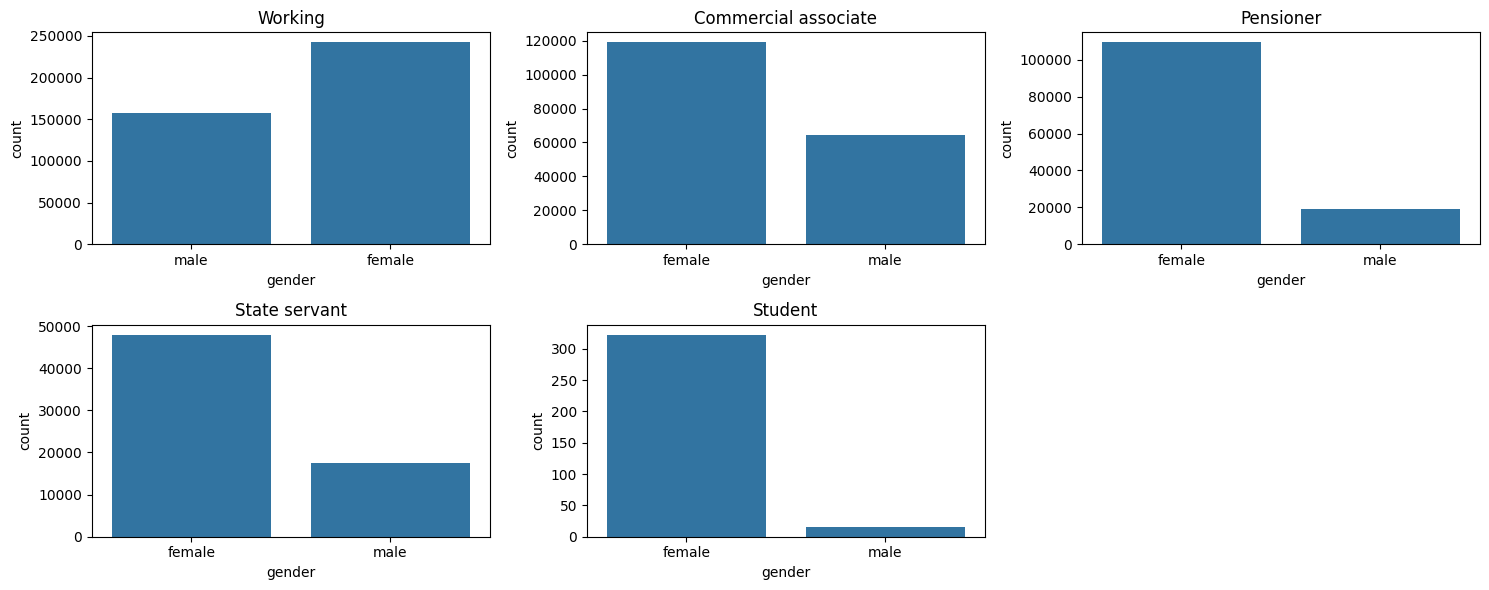

In [35]:
#checking the relationship between income type and gender
count = df['income_type'].value_counts()

plt.figure(figsize=(15, 6))

# Plotting the countplot for each unique value of 'income_type'
for i in range(len(count)):
    plt.subplot(2, 3, i+1)
    plt.title(count.index[i])  # Use the unique value of 'income_type' as the title
    sns.countplot(data=df[df['income_type'] == count.index[i]], x='gender')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

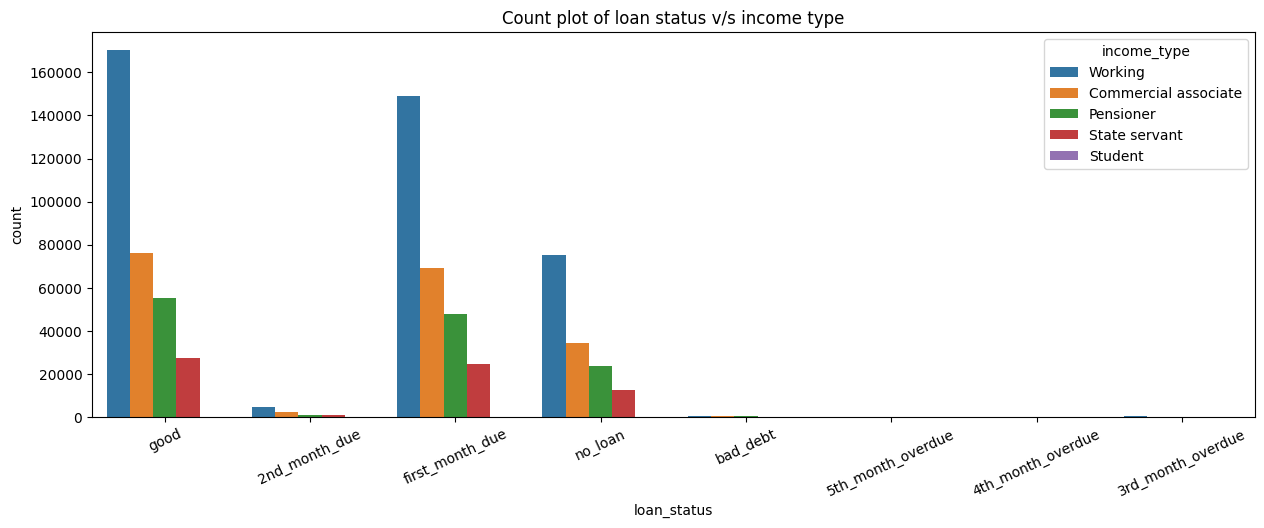

In [36]:
# checking the relationship between loan status and income type

# defining the figure size
plt.figure(figsize=(15, 5))

# plotting the countplot
sns.countplot(data=df, x=df['loan_status'], hue=df['income_type'])

# defining the tilte
plt.title('Count plot of loan status v/s income type')
plt.xticks(rotation=25)
plt.show()

In [37]:
#getting insights from gender v/s income type & loan status with value counts less than 1000
count = df.groupby('gender')[['income_type' , 'loan_status']].value_counts()

count[count<1000].unstack()

loan_status                  2nd_month_due  3rd_month_overdue  \
gender income_type                                              
female Commercial associate            NaN              117.0   
       Pensioner                     950.0              143.0   
       State servant                 592.0               26.0   
       Student                         NaN                NaN   
       Working                         NaN              224.0   
male   Commercial associate          883.0               70.0   
       Pensioner                     207.0               30.0   
       State servant                 175.0               13.0   
       Student                         1.0                NaN   
       Working                         NaN              178.0   

loan_status                  4th_month_overdue  5th_month_overdue  bad_debt  \
gender income_type                                                            
female Commercial associate               47.0               45.0     284.0   
       Pensioner                          66.0               35.0     252.0   
       State servant                      12.0                6.0      47.0   
       Student                             NaN                NaN       NaN   
       Working                            53.0               42.0     226.0   
male   Commercial associate               30.0               27.0     277.0   
       Pensioner                          14.0                9.0      61.0   
       State servant                       5.0                2.0      14.0   
       Student                             NaN                NaN       NaN   
       Working                            59.0               48.0     366.0   

loan_status                  first_month_due   good  no_loan  
gender income_type                                            
female Commercial associate              NaN    NaN      NaN  
       Pensioner                         NaN    NaN      NaN  
       State servant                     NaN    NaN      NaN  
       Student                          57.0  196.0     69.0  
       Working                           NaN    NaN      NaN  
male   Commercial associate              NaN    NaN      NaN  
       Pensioner                         NaN    NaN      NaN  
       State servant                     NaN    NaN      NaN  
       Student                          10.0    4.0      NaN  
       Working                           NaN    NaN      NaN

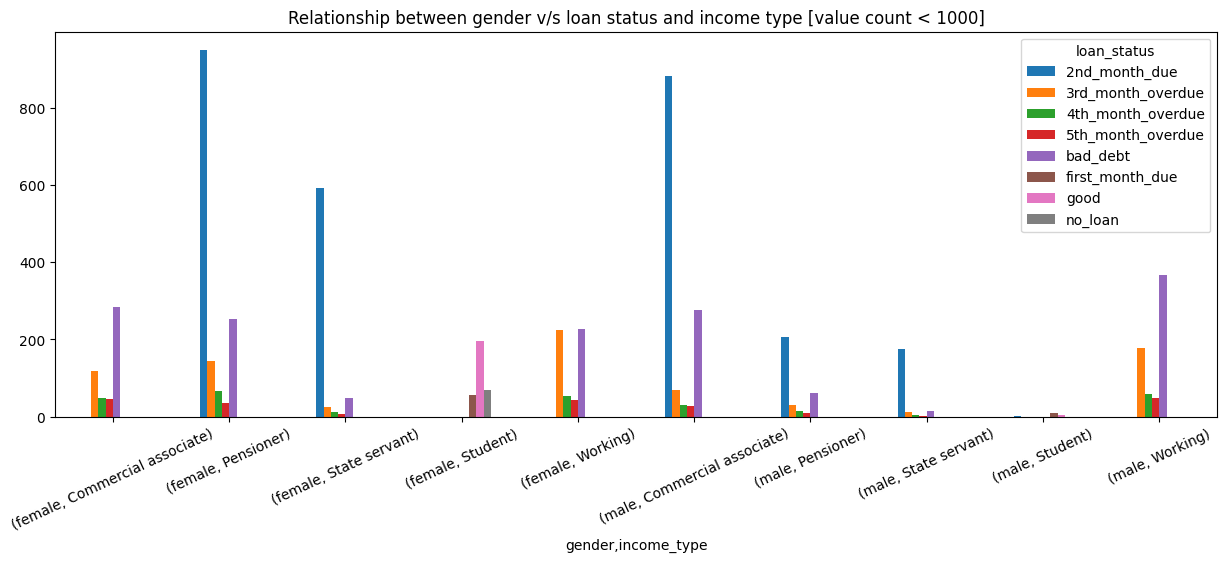

In [38]:
# checking the relationship between gender v/s income type & loan status 
count = df.groupby('gender')[['income_type', 'loan_status' ]].value_counts()

# plotting the barh plot for [gender v/s income type & loan status] value count less than 1000
count[count<1000].unstack().plot(kind='bar' , figsize=(15, 5) , legend=True ) 
# defining the tilte
plt.title('Relationship between gender v/s loan status and income type [value count < 1000]')
# rotating the x-axis labels
plt.xticks(rotation=25)
plt.show()

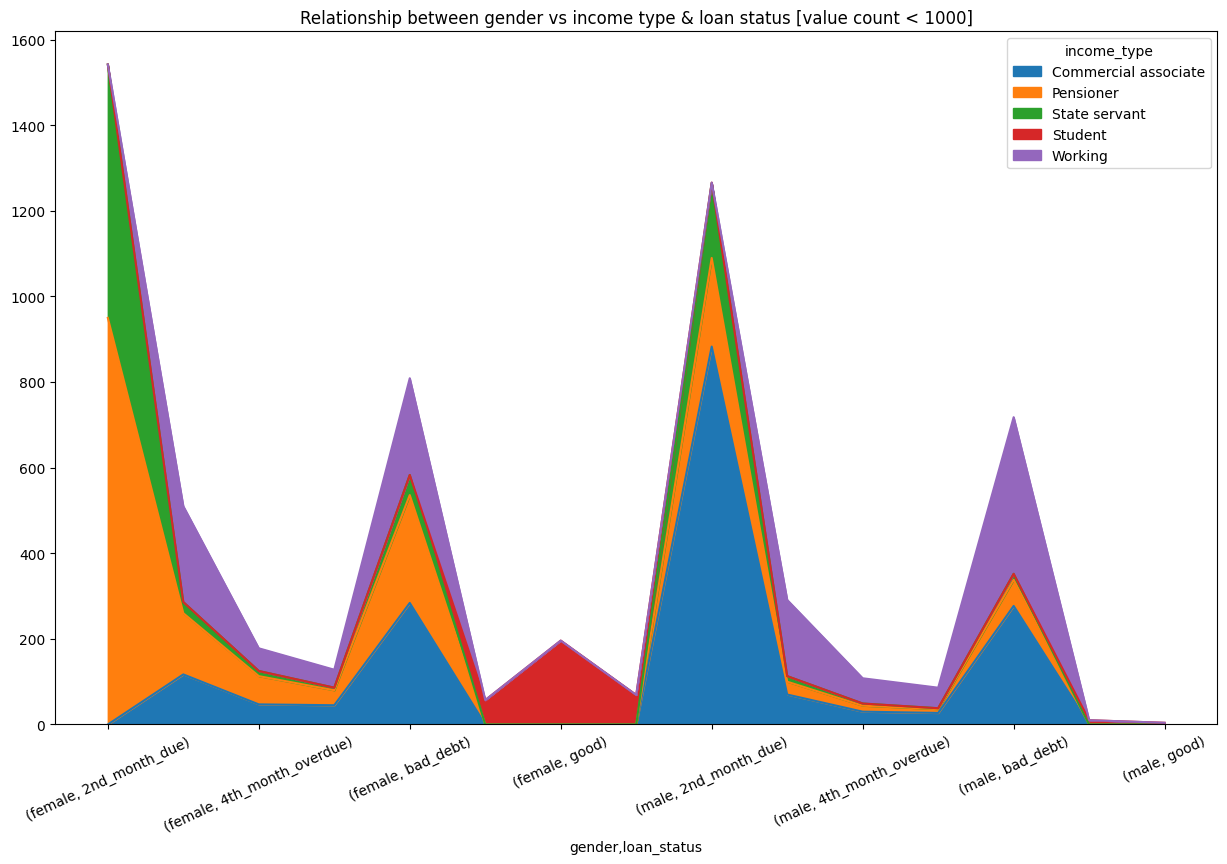

In [39]:
# checking the relationship between gender vs income type & loan status
count = df.groupby('gender')[['loan_status','income_type']].value_counts()
# plotting the area plot for [gender vs income type & loan status] value count less than 1000
count[count<1000].unstack().plot(kind='area' , figsize=(15, 9)) 
# defining the tilte
plt.title('Relationship between gender vs income type & loan status [value count < 1000]')
# rotating the x-axis labels
plt.xticks(rotation=25)
plt.show()

In [40]:
# checking the value count of education
df.education.value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: education, dtype: int64

In [41]:
#value count of education vs gender
# checking the relationship between gender and education
df.groupby('gender')[['education']].value_counts()

gender  education                    
female  Secondary / secondary special    349975
        Higher education                 144457
        Incomplete higher                 18638
        Lower secondary                    5177
        Academic degree                     604
male    Secondary / secondary special    174286
        Higher education                  69176
        Incomplete higher                 11691
        Lower secondary                    3478
        Academic degree                     233
dtype: int64

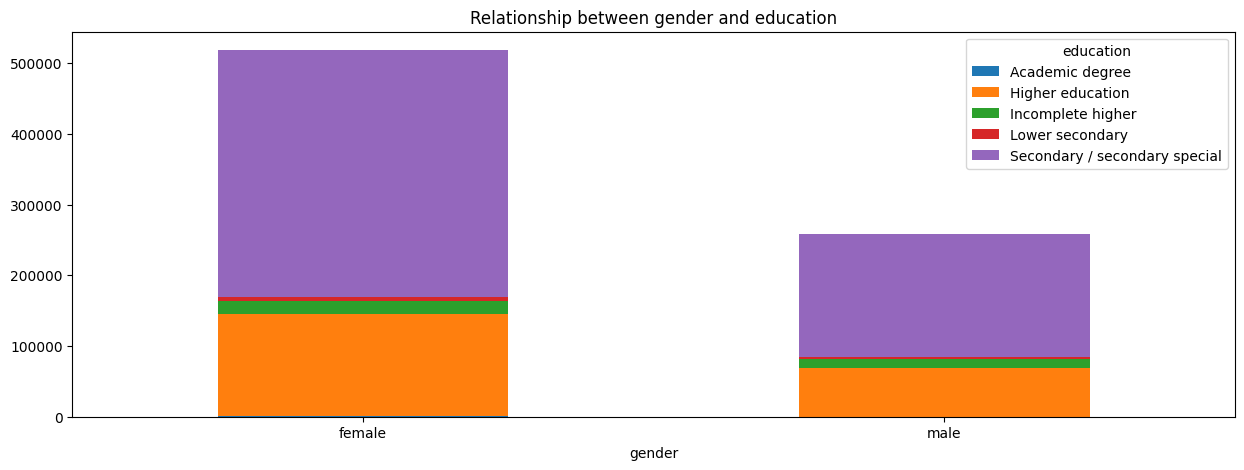

In [42]:
# plotting the countplot for education vs gender
df.groupby('gender')[['education']].value_counts().unstack().plot(kind='bar', figsize=(15, 5) , stacked=True)

# rotating the x-axis labels
plt.xticks(rotation=360)

# defining the title
plt.title('Relationship between gender and education')
plt.show()

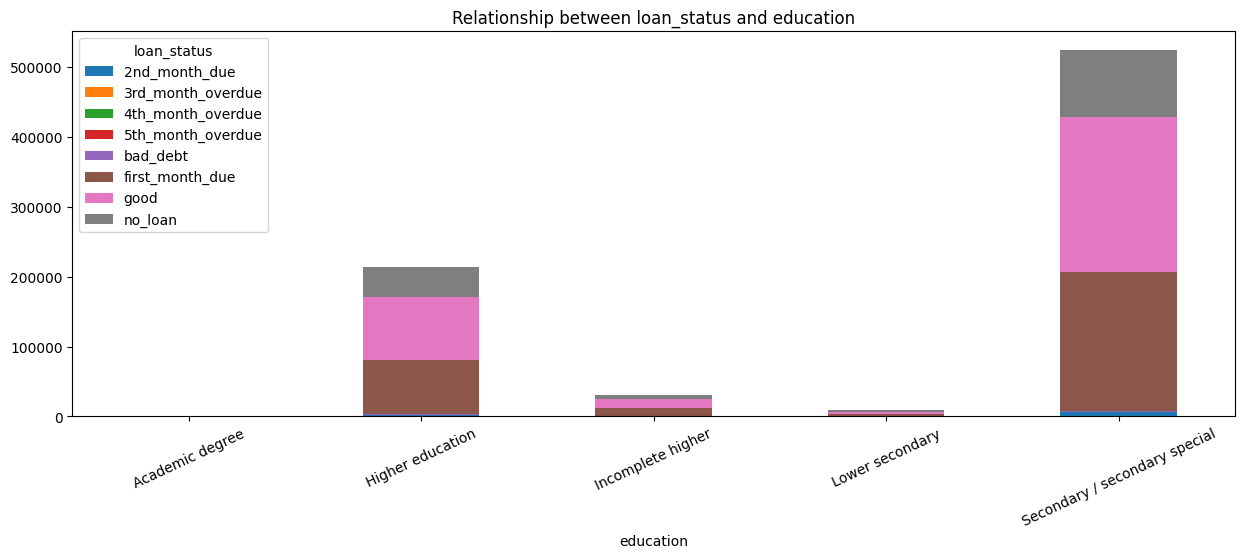

In [43]:
# checking the relationship between loan_status and education using groupby function
df.groupby('education')[['loan_status']].value_counts().unstack().plot(kind='bar', figsize=(15, 5) , stacked= True)
# defining the tilte
plt.title('Relationship between loan_status and education')
# rotating the x-axis labels
plt.xticks(rotation=25)
plt.show()

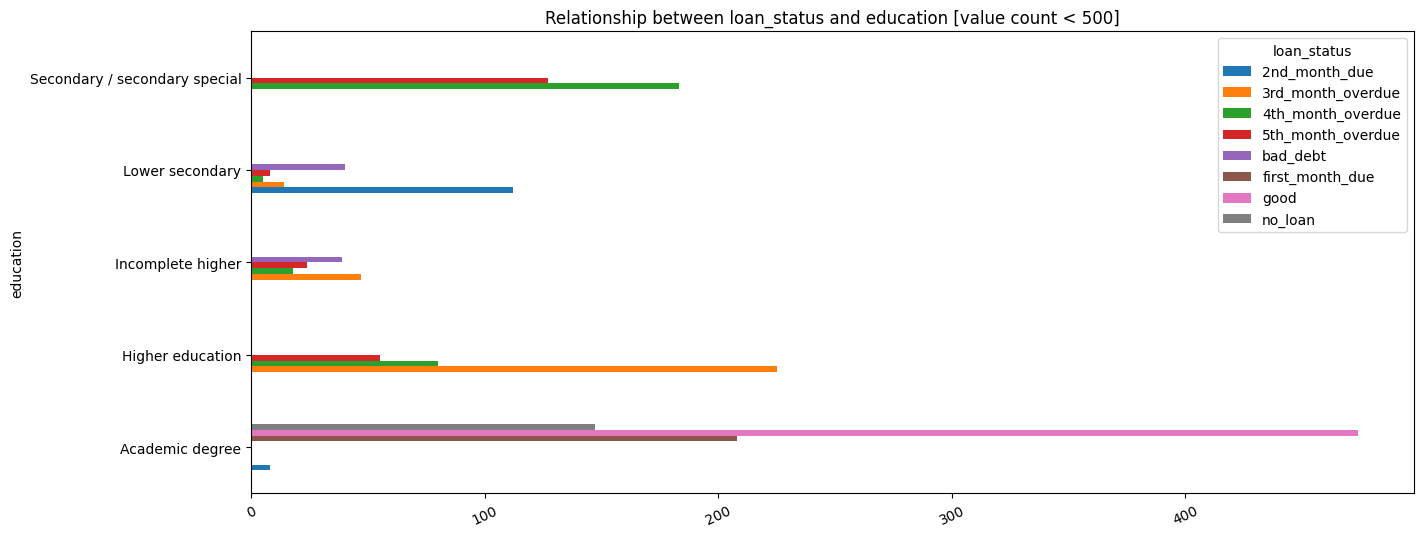

In [44]:
# checking the relationship between loan_status and education
count = df.groupby('education')[['loan_status']].value_counts()

# plotting the barh plot for education vs loan_status which have values less than 500
count[count<=500].unstack().plot(kind='barh' , figsize=(15, 6))
# defining the tilte
plt.title('Relationship between loan_status and education [value count < 500]')
# rotating the x-axis labels
plt.xticks(rotation=25)
plt.show()

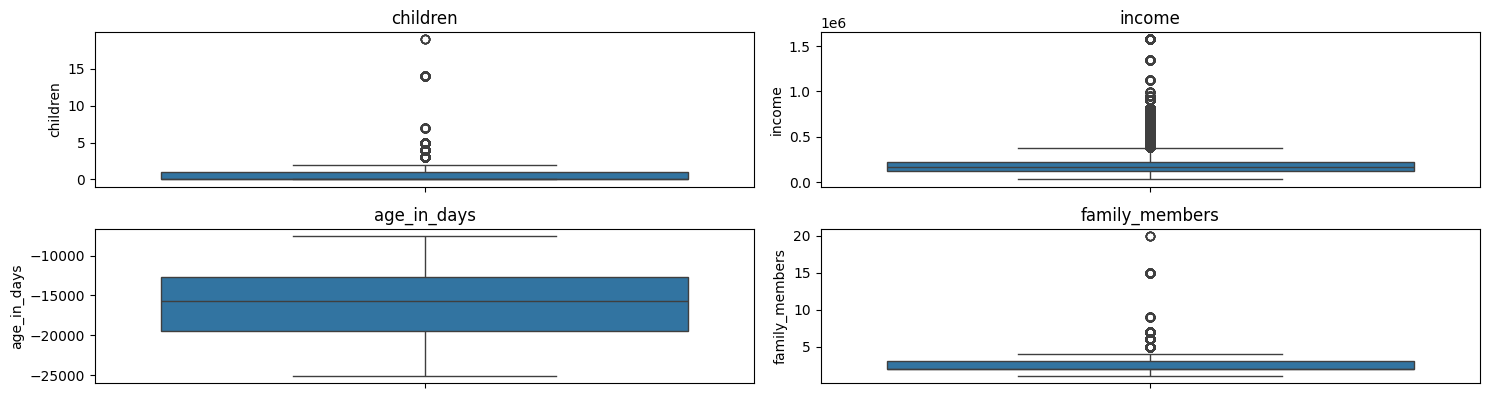

In [45]:
# checking the relationship between loan_status and income

# filtering the list of specific columns    
col = ['children', 'income', 'age_in_days',  'family_members' ]

# defining the figure size
plt.figure(figsize=(15, 6))

# plotting the countplot using for loop
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.title(col[i])  # Use the column name as the title
    sns.boxplot(data=df, y=col[i])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [46]:
# removing outliers

# filtering the list of specific columns
col = ['children', 'income' , 'family_members']

# for loop to remove outliers
for i in range(len(col)):
    # calculating the first and third quartile
    q1 = df[col[i]].quantile(0.25)
    q3 = df[col[i]].quantile(0.75)
    # calculating the interquartile range
    iqr = q3 - q1
    # calculating the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # replacing the outliers with the median
    df[col[i]] = np.where((df[col[i]] >= upper_bound) | (df[col[i]] <= lower_bound), df[col[i]].median() , df[col[i]])

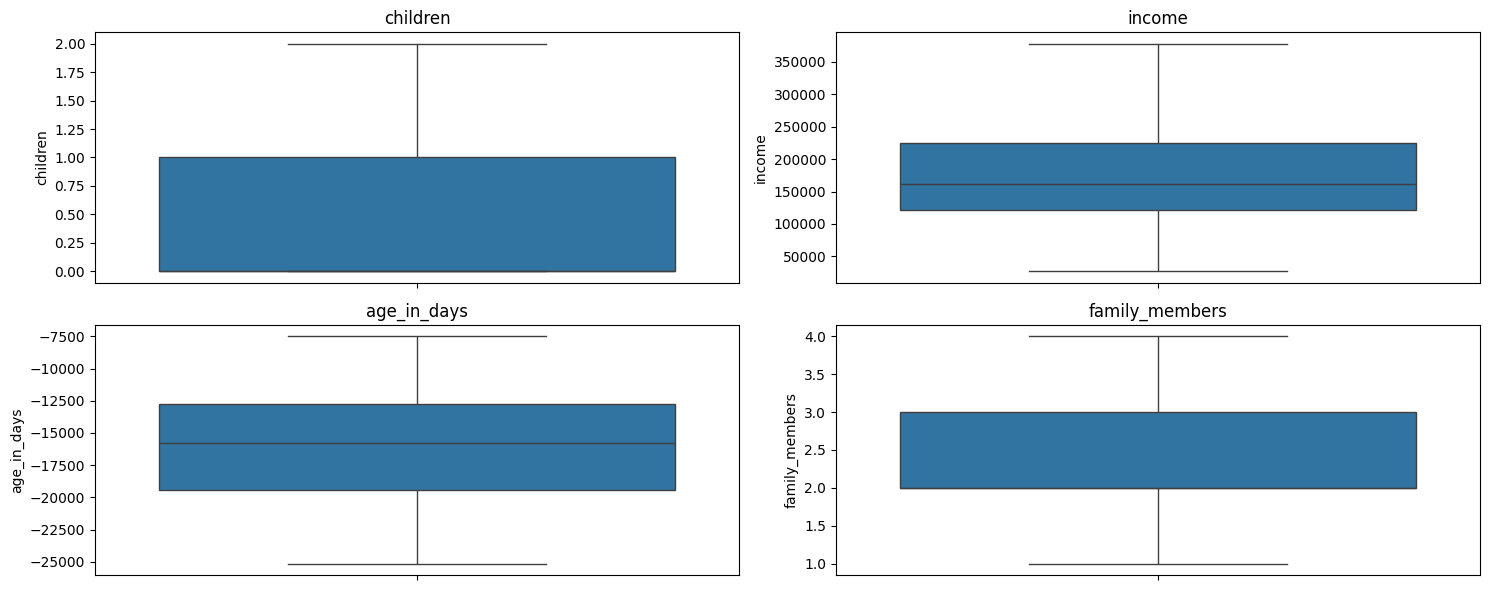

In [47]:
col = ['children', 'income', 'age_in_days',  'family_members']

plt.figure(figsize=(15, 6))

for i in range(len(col)):
    plt.subplot(2, 2, i+1)
    plt.title(col[i])  # Use the column name as the title
    sns.boxplot(data=df, y=col[i])

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [48]:
# filtering the list of specific columns
col = ['children', 'income', 'age_in_days',  'family_members']

# calling the standard scaler
sc = StandardScaler()
# for loop to scale the specific columns
for i in col:
    df[i] = sc.fit_transform(df[[i]])

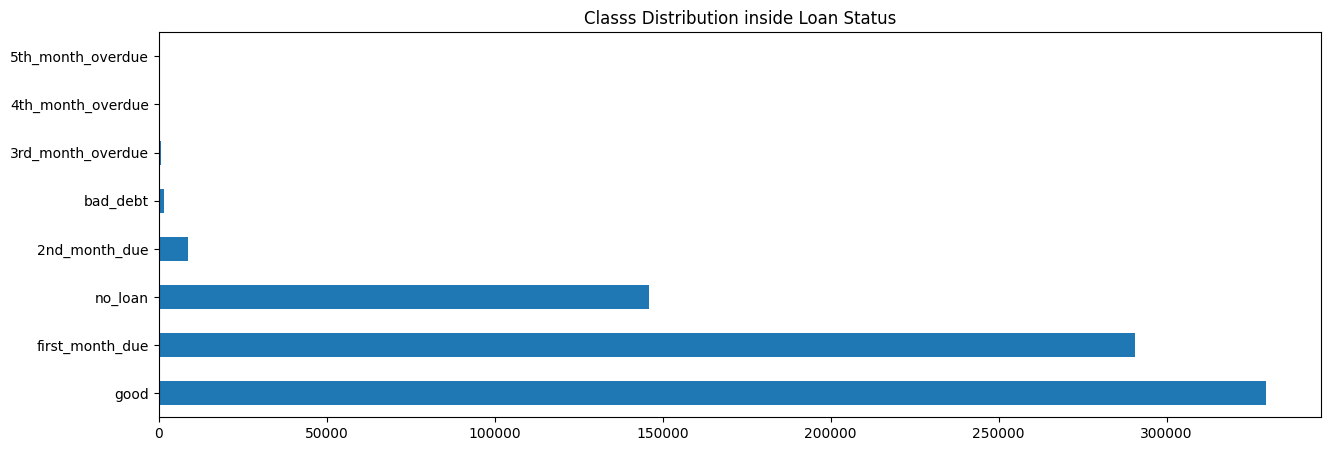

In [49]:
# checking the distribution of loan_status
df.loan_status.value_counts().plot(kind='barh', figsize=(15, 5))
# defining the title
plt.title('Classs Distribution inside Loan Status')
plt.show()

In [50]:
df.head()

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,0,C,good
1,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-1,C,good
2,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-2,C,good
3,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-3,C,good
4,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-4,C,good


In [51]:
# filtering the list of specific columns which we need to encode
col = ['gender', 'own_car', 'own_property', 'income_type','education', 'family_status', 'housing_type', 'status']

# calling the label encoder
le = LabelEncoder()

# for loop to encode the specific columns
for i in col:
    df[i] =le.fit_transform(df[i] )

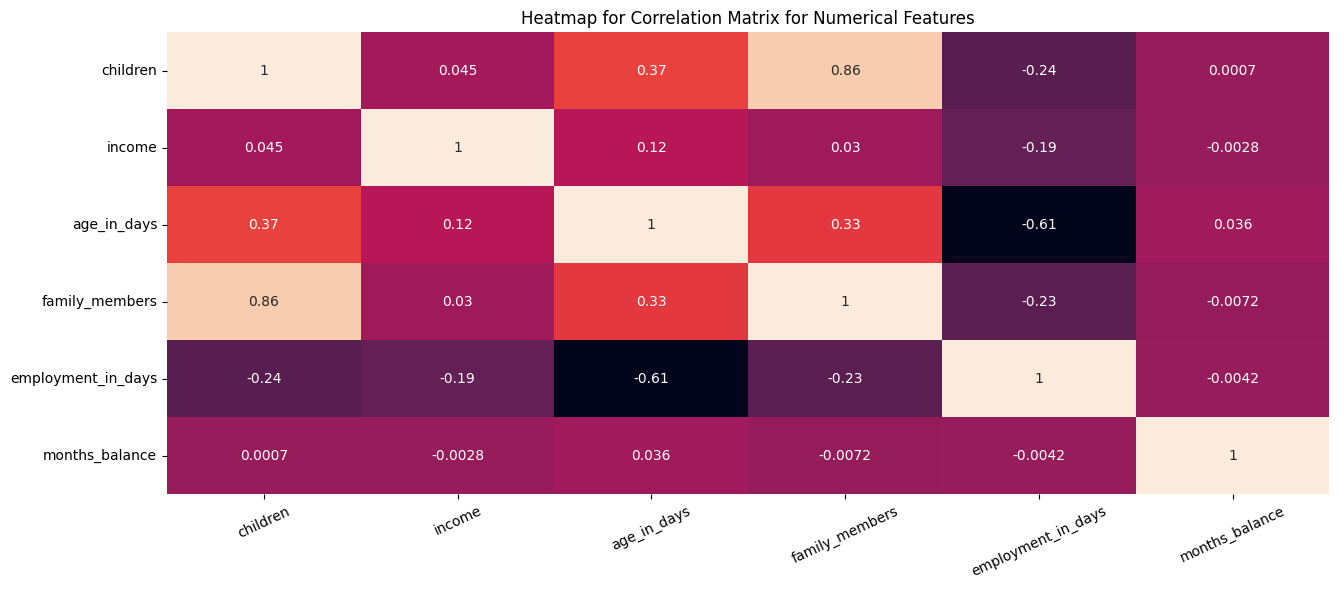

In [52]:
# correlation matrix

# defining the figure size
plt.figure(figsize=(15, 6))
# plotting the heatmap
sns.heatmap(df[['children', 'income', 'age_in_days',  'family_members', 'employment_in_days', 'months_balance']].corr(), annot=True , cbar=False) 
# defining the title and rotation of x-axis labels
plt.xticks(rotation=25)
plt.title('Heatmap for Correlation Matrix for Numerical Features')
plt.show()

In [53]:
# Drop 'loan_status' and 'status' columns from col
col = df.drop(['loan_status', 'status'], axis=1) # Assume that col is our independent variable

# Compute variance inflation factor

# Create a dataframe to store the VIF
factor  = pd.DataFrame(columns=["VIF", "Features"] )
# For each column, compute the VIF
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]

# Display the results
factor

,VIF,Features
0,1.019165,ID
1,1.240486,gender
2,1.218307,own_car
3,1.096036,own_property
4,12.236508,children
5,1.165436,income
6,1.187861,income_type
7,1.090580,education
8,4.476697,family_status
9,1.072517,housing_type


In [54]:
X = df.drop(['loan_status' , 'status', 'children' , 'family_members', 'mobile'], axis = 1) # Assume that X is our independent variable

y = df['loan_status'] # Assume that y is our dependent variable

In [55]:
print(f'The shpape of X ={X.shape} \n') # checking the shape of X

print(f'The shape of y ={y.shape}') # checking the shape of y

The shpape of X =(777715, 15) 

The shape of y =(777715,)


In [56]:
# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [57]:
# instantiating the model
model = RandomForestClassifier()

In [58]:
# fitting the model
model.fit(X_train, y_train )

RandomForestClassifier()

In [59]:
# making predictions on the test set
y_pred = model.predict(X_test)

In [60]:
# creating a dataframe to compare the actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
489996,first_month_due,first_month_due
293437,first_month_due,first_month_due
544675,first_month_due,first_month_due
688170,good,good
582519,no_loan,first_month_due
248623,good,good
476807,first_month_due,first_month_due
693691,good,good
89611,good,good
756662,good,good


In [61]:
#Model Evaluation
(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.2f} %')

'Accuracy Score : 88.19 %'

In [62]:
print(f"Precision Score : {precision_score(y_test, y_pred , average = 'micro'):.2f}")

Precision Score : 0.88


In [63]:
print(f"F1-Score : {f1_score(y_test, y_pred , average='micro')}")

F1-Score : 0.8819426139395536


In [64]:
# classification report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    2nd_month_due       0.34      0.27      0.30      1743
3rd_month_overdue       0.18      0.15      0.16       150
4th_month_overdue       0.02      0.02      0.02        52
5th_month_overdue       0.05      0.06      0.06        33
         bad_debt       0.93      0.85      0.89       307
  first_month_due       0.85      0.88      0.86     58003
             good       0.95      0.95      0.95     66226
          no_loan       0.83      0.78      0.80     29029

         accuracy                           0.88    155543
        macro avg       0.52      0.49      0.50    155543
     weighted avg       0.88      0.88      0.88    155543

